In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/Users/scarere/Documents/UofT/OneDrive-UofT/mbp1413_final_project/code')
from utils.segment_metrics import IOU_eval
import torch
from utils.helper_functions import load_data
import numpy as np
import torch
from utils.segment_metrics import IOU_eval
import tqdm.notebook as t

In [126]:
model_path = '../trained_models/baselines/unet_basic/unet_basic_test1'
model_name = 'unet_basic_test1.pt'
data_dir = '../data'

In [127]:
model = torch.load(os.path.join(model_path, model_name), map_location=torch.device('cpu'))
model = model.eval()


In [128]:
#x_train, y_train = load_data(os.path.join(data_dir, 'data_sayan/undistorted', 'train.pt'), switch_channel_dim=True, thresh=train_args['train_mask_threshold'])
x_val, y_val = load_data(os.path.join(data_dir, 'downsized_cropped', 'val.pt'), switch_channel_dim=True, thresh=0.5)

In [129]:
preds3 = []
y_val = y_val >= 0.5
for val in t.tqdm(x_val):
    val = val.unsqueeze(0)
    pred = model(val).squeeze(0)
    preds3.append(pred)

  0%|          | 0/77 [00:00<?, ?it/s]

In [130]:
preds2 = model(x_val)
preds4 = model(x_val)

In [131]:
preds = torch.Tensor(torch.stack(preds3, axis=0))
preds = preds > 0.5
print(preds.shape)
print(y_val.shape)
iou_mean = IOU_eval().iou_evaluate_better(y_val, preds)
print(iou_mean)

torch.Size([77, 1, 128, 128])
torch.Size([77, 1, 128, 128])
tensor(0.6996)


In [132]:
preds2 = preds2 > 0.5
preds4 = preds4 > 0.5
print(preds2.shape)
print(preds4.shape)
print(y_val.shape)
m = IOU_eval().iou_evaluate_better(preds4.int(), preds2)
print(m)

torch.Size([77, 1, 128, 128])
torch.Size([77, 1, 128, 128])
torch.Size([77, 1, 128, 128])
tensor(1.)


torch.Size([77, 128, 128, 1])


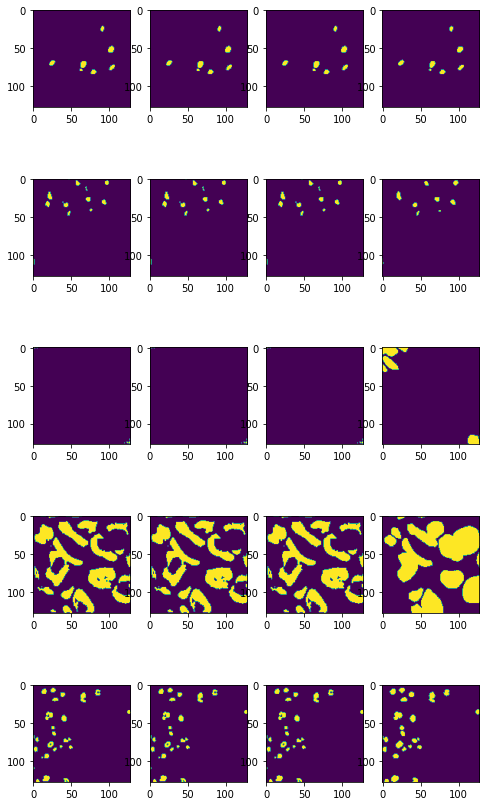

In [133]:
fig = plt.figure(figsize=(8, 15))
predsA = preds2.permute(0, 2, 3, 1)
predsB = preds4.permute(0, 2, 3, 1)
predsC = preds.permute(0, 2, 3, 1)
y_val_cl = y_val.permute(0, 2, 3, 1)
print(predsA.shape)
for i in range(0, 20, 4):
    fig.add_subplot(5, 4, i+1)
    plt.imshow(predsA[i], cmap='gray')
    fig.add_subplot(5, 4, i+2)
    plt.imshow(predsB[i], cmap='gray')
    fig.add_subplot(5, 4, i+3)
    plt.imshow(predsC[i], cmap='gray')
    fig.add_subplot(5, 4, i+4)
    plt.imshow(y_val_cl[i], cmap='gray')